<a href="https://colab.research.google.com/github/sener7106/TiL/blob/main/ML_20220120_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

plt.style.use('ggplot')

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
csv_path = '/content/drive/MyDrive/ML_MacineLearning/bike.csv'



In [72]:
train = pd.read_csv(csv_path)

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [74]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [75]:
# date time 컬럼의 날짜를 계산하기 위해  datetime 을 변환
train['datetime'] = pd.to_datetime(train['datetime'])

datetime = train["datetime"]              

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [77]:
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [78]:
train["year"] = datetime.dt.year
train["month"] = datetime.dt.month
train["day"] = datetime.dt.day
train["hour"] = datetime.dt.hour
train["minute"] = datetime.dt.minute
train["second"] = datetime.dt.second

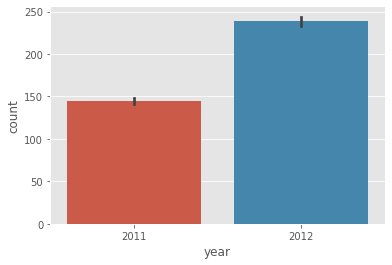

In [79]:

sns.barplot(data = train, x='year', y= 'count') # count -> 자전거 대여 회수

In [80]:
train['count'].mean()

191.57413191254824

In [81]:
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


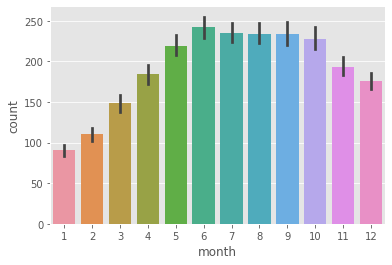

In [82]:
sns.barplot(data = train, x = 'month', y = 'count') # 4분위수 계산에 포함되는 검은선

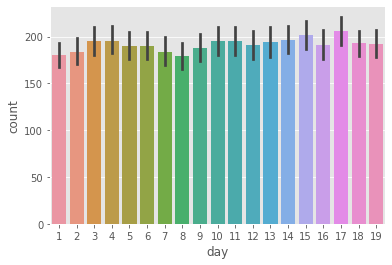

In [83]:
sns.barplot(data = train, x = 'day', y = 'count')

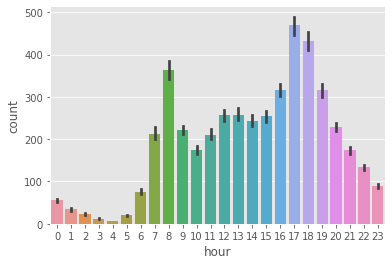

In [84]:
sns.barplot(data = train, x= 'hour', y = 'count')

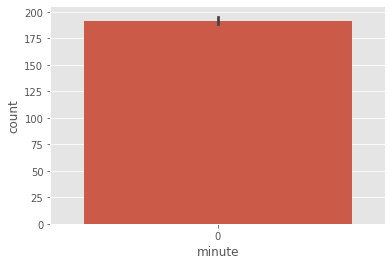

In [85]:
# minute 컬럼에 저장된 데이터를 기준으로 count컬럼의 평균을 조회
sns.barplot(data = train, x = 'minute', y = 'count')

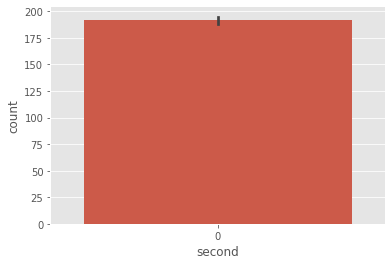

In [86]:
sns.barplot(data = train, x = 'second', y = 'count')

In [87]:
train.pivot_table(index = 'year', values = 'count')

,count
year,
2011,144.223349
2012,238.560944


In [88]:
train.pivot_table(index = 'month', values = 'count')

,count
month,
1,90.366516
2,110.003330
3,148.169811
4,184.160616
5,219.459430
6,242.031798
7,235.325658
8,234.118421
9,233.805281


In [89]:
train.pivot_table(index = 'hour', values = 'count')

,count
hour,
0,55.138462
1,33.859031
2,22.899554
3,11.757506
4,6.407240
5,19.767699
6,76.259341
7,213.116484
8,362.769231


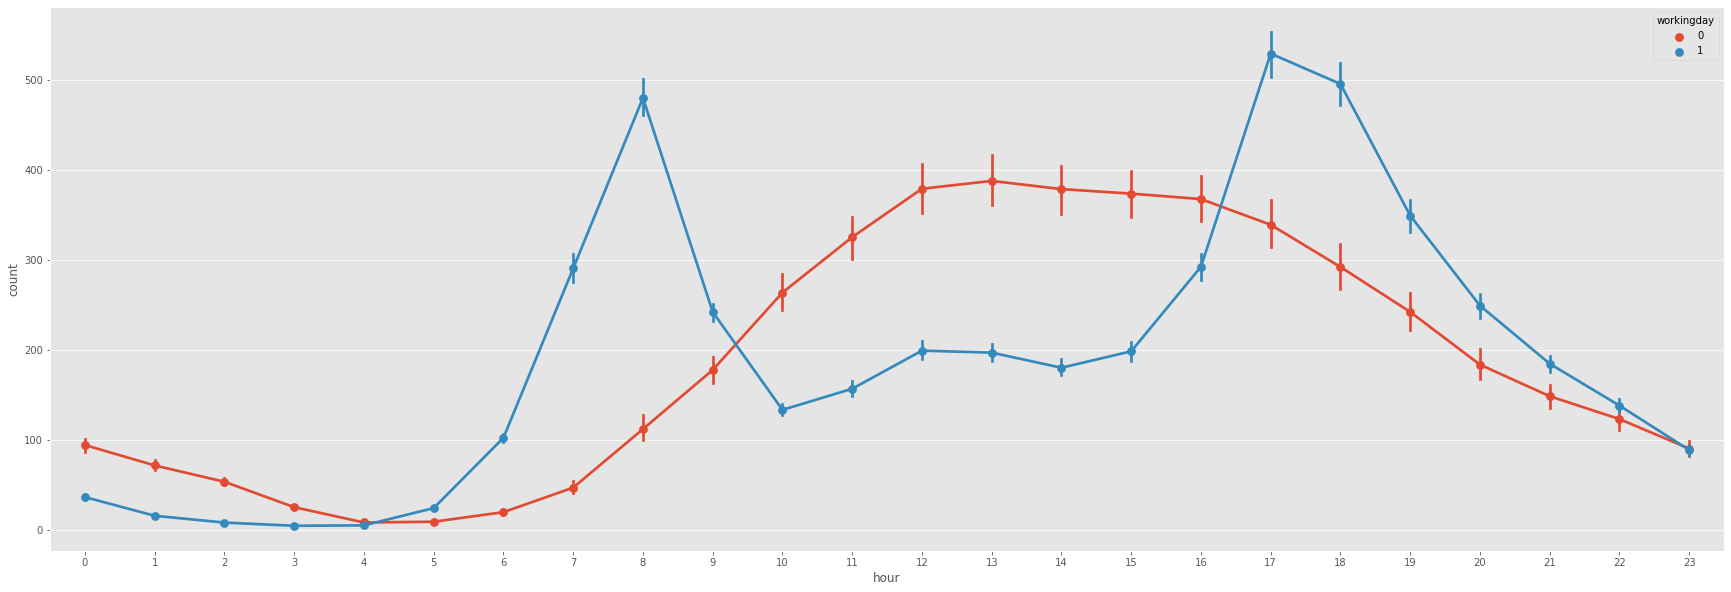

In [90]:
plt.figure(figsize = (30, 10))
sns.pointplot(data = train, x = 'hour', y ='count', hue = 'workingday')

In [91]:
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0


In [92]:
train['dayofweek'] = datetime.dt.dayofweek
train['dayofweek'].head()

0    5
1    5
2    5
3    5
4    5
Name: dayofweek, dtype: int64

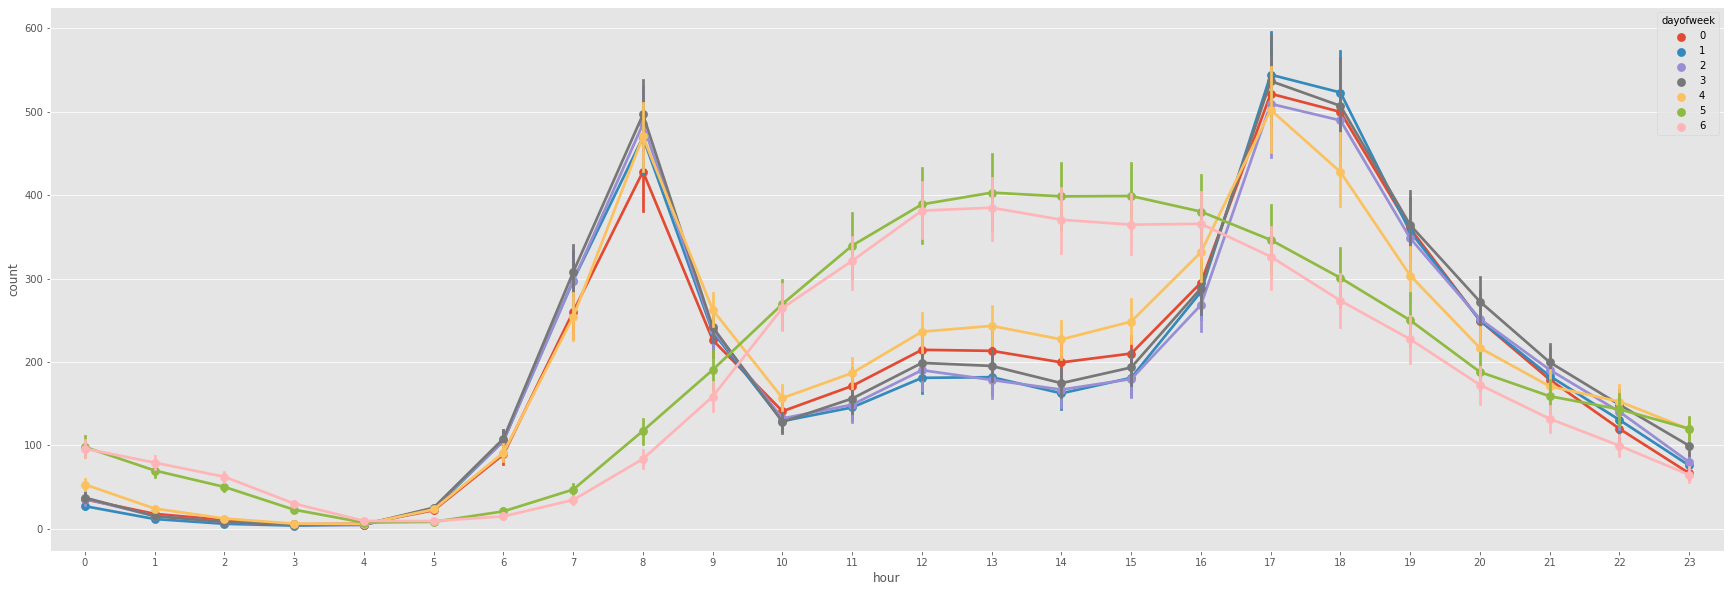

In [93]:
# 0~4 : 주중 5~6: 주말  주중과 주말의 자전거 대여 분포가 다름

plt.figure(figsize = (30, 10))
sns.pointplot(data = train, x = 'hour', y ='count', hue = 'dayofweek')

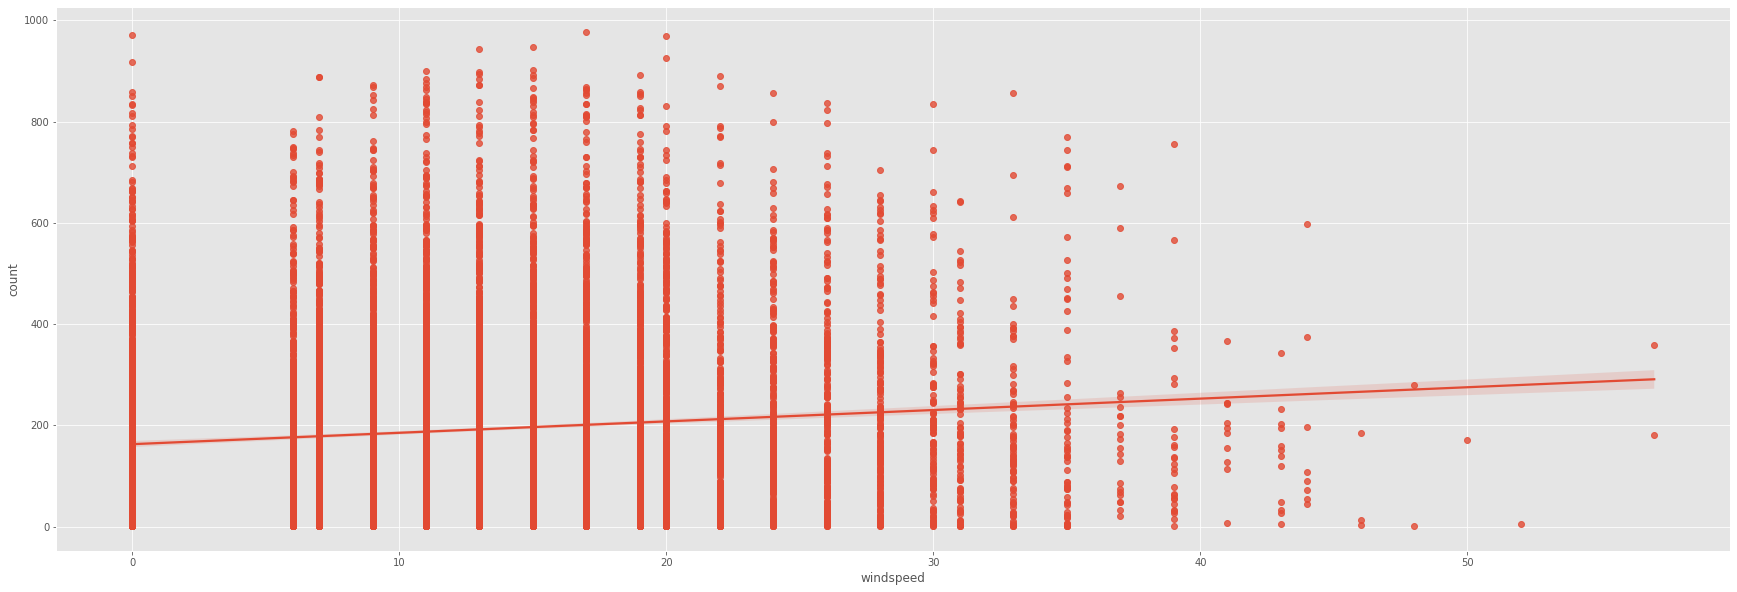

In [94]:
plt.figure(figsize = (30, 10))
# 풍속별 count 컬럼의 값을 점으로 표시

sns.regplot(x = 'windspeed', y = 'count', data = train)

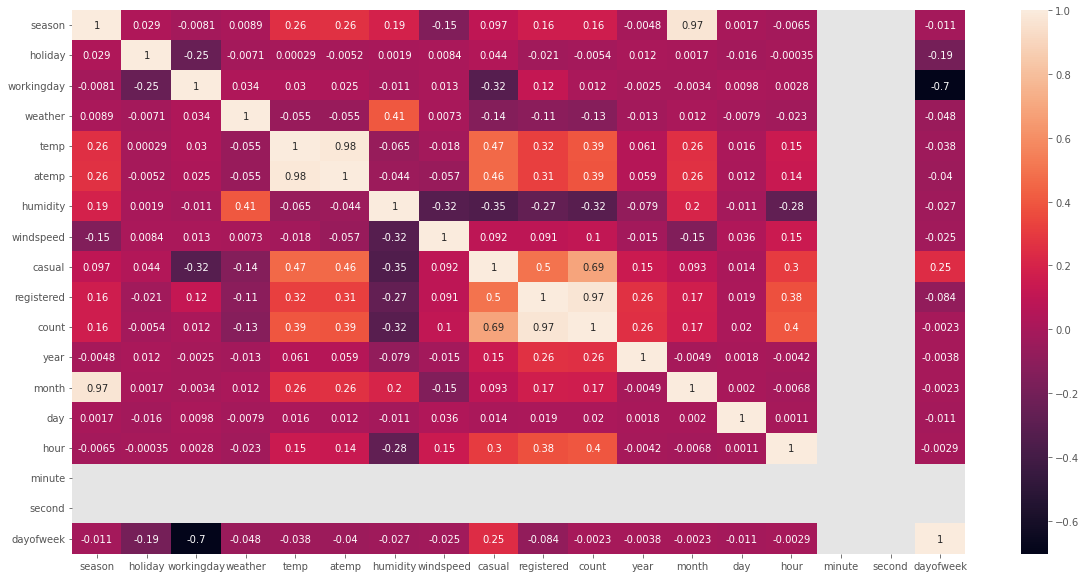

In [95]:
flg, ax = plt.subplots()
flg.set_size_inches(20,10)
# annot = True 컬러명출력
sns.heatmap(train.corr(), annot= True)

In [96]:
A = pd.DataFrame({'sal' : [1200, 1600, 5600, 6000, 7000]} )
B = pd.DataFrame({'sal' : [4000, 4500, 4250, 5000, 3650]} )
A 

,sal
0,1200
1,1600
2,5600
3,6000
4,7000


In [97]:
A-A.mean()

,sal
0,-3080.0
1,-2680.0
2,1320.0
3,1720.0
4,2720.0


In [98]:
import math

# a 회수의 분산
# 데이터수 - 1 => 자유도 ㅇ
((A - A.mean()) ** 2).sum() / 4

sal    7192000.0
dtype: float64

In [99]:
A.var()

sal    7192000.0
dtype: float64

In [100]:
math.sqrt(A.var())

2681.790446697877

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87f4a59f50>]],
      dtype=object)

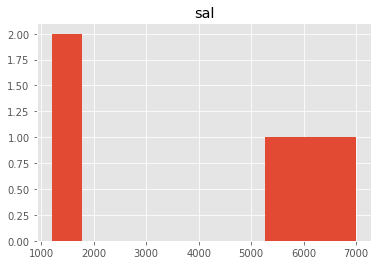

In [101]:
A.hist()

In [102]:
np.std(A)

sal    2398.666296
dtype: float64

In [103]:
np.var(A)

sal    5753600.0
dtype: float64

In [104]:
kor_grd = pd.DataFrame ({ 'sal' : [80, 60, 70, 40, 30]} )

In [105]:
kor_dev = (kor_grd - kor_grd.mean())

In [106]:
A_dev = A-A.mean()

In [107]:
(kor_dev * A_dev).sum() / 4

sal   -41100.0
dtype: float64

In [108]:
df01= pd.DataFrame({'eng_rank': [1,4,2,9,9], "kor_rank" : [10,8, 7, 6, 4]})

In [109]:
df01['eng_rank'].mean()

5.0

In [110]:
df01['kor_rank'].mean()

7.0

In [111]:
np.corrcoef(df01['eng_rank'], df01['kor_rank'])

array([[ 1.        , -0.85146932],
       [-0.85146932,  1.        ]])

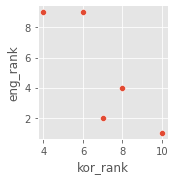

In [112]:
sns.pairplot(data = df01, x_vars = 'kor_rank', y_vars = 'eng_rank')

In [113]:
 eng_sub = df01["eng_rank"] - 5

In [114]:
kor_sub = df01['kor_rank'] - 7

In [115]:
(((eng_sub) * (kor_sub)).sum()) / (4 * math.sqrt(df01.eng_rank.var()) * math.sqrt(df01.kor_rank.var())) 

-0.85146931829632

In [116]:
# causal : 회원가입을 하지 안혹 빌려간 자전거
# registerd : 회원이 빌려간 자전거
# count : 전체가 빌려간 자전거

In [117]:
train.head

<bound method NDFrame.head of                  datetime  season  holiday  ...  minute  second  dayofweek
0     2011-01-01 00:00:00       1        0  ...       0       0          5
1     2011-01-01 01:00:00       1        0  ...       0       0          5
2     2011-01-01 02:00:00       1        0  ...       0       0          5
3     2011-01-01 03:00:00       1        0  ...       0       0          5
4     2011-01-01 04:00:00       1        0  ...       0       0          5
...                   ...     ...      ...  ...     ...     ...        ...
10881 2012-12-19 19:00:00       4        0  ...       0       0          2
10882 2012-12-19 20:00:00       4        0  ...       0       0          2
10883 2012-12-19 21:00:00       4        0  ...       0       0          2
10884 2012-12-19 22:00:00       4        0  ...       0       0          2
10885 2012-12-19 23:00:00       4        0  ...       0       0          2

[10886 rows x 19 columns]>

In [118]:
y = train['count']
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [119]:
X = train.copy()
X.pop("count") # X에서 count 컬럼 삭제
X.pop("datetime")
X.pop("registered")
X.pop("casual")
X.pop("day")
X.pop("minute")
X.pop("second")

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: second, Length: 10886, dtype: int64

In [120]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,22,2


In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 156)

## RandomForest 알고리즘을 이용한 예측

In [122]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 0)

In [123]:
# 알고리즘을 이용하여 값을 예측(회귀)
rf_model

RandomForestRegressor(random_state=0)

In [124]:
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)

In [125]:
pred

array([ 33.95, 547.64,  89.25, ..., 318.19, 143.25, 330.48])

In [128]:
from sklearn.metrics import mean_squared_error
# true data y_test 와 예측 값 pred 의 잔차 제곱의 합을 계산
# 성능 측정을 위한 오차 cost function
# 회귀분석의 성능 측정
print (' MSE: ', mean_squared_error(y_test, pred)) 

 MSE:  1508.207127363649


In [131]:
# count 컬럼의 데이터에서 25% 에 해당하는 데이터 조회
# np.percentile(train['count'], 25)
q1 = np.percentile(train["count"], 25)
q1

42.0

In [132]:
q3 = np.percentile(train["count"], 75)

In [134]:
IQR = q3 - q1
IQR

242.0

## 이상치 측정

- q1 - (1.5 * IQR) 보다 작거나
- q3 + 1.5 * IQR 보다 크거나
-> 95% 신뢰구간에서 이상치 발생

이상치가 아닌 데이터만 리턴

In [137]:
trainWithoutOutliers = train[(train['count']>=q1 - (1.5 * IQR)) & (train['count'] <= (q3 + 1.5 * IQR))]

In [138]:
trainWithoutOutliers

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


In [ ]:
s